# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [6]:
import pandas as pd
import numpy as np
import sqlite3
from pandas.io import sql

sqlite_db = '../../assets/datasets/enron.db'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()



print(c)

# data.to_sql(sqlite_db,
#             con=conn,
#             if_exists='replace',
#             index=False)


In [13]:
query1 = c.execute('SELECT * from EmployeeBase LIMIT 5')
# Save (commit) the changes
conn.commit()



In [14]:
query1.fetchall()

[(1,
  u'John Arnold',
  u'Forestry',
  u'ENA Gas Financial',
  u'VP Trading',
  u'Male',
  u'Senior'),
 (2,
  u'Harry Arora',
  u'Forestry',
  u'ENA East Power',
  u'VP Trading',
  u'Male',
  u'Senior'),
 (3,
  u'Robert Badeer',
  u'Forestry',
  u'ENA West Power',
  u'Mgr Trading',
  u'Male',
  u'Junior'),
 (4,
  u'Susan Bailey',
  u'Legal',
  u'ENA Legal',
  u'Specialist Legal',
  u'Female',
  u'Junior'),
 (5,
  u'Eric Bass',
  u'Forestry',
  u'ENA Gas Texas',
  u'Trader',
  u'Male',
  u'Junior')]

In [25]:
sql.read_sql('select * from EmployeeBase', con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior
5,6,Don Baughman Jr.,Forestry,ENA East Power,Mgr Trading,Male,Junior
6,7,Sally Beck,Other,Energy Operations,VP,Female,Senior
7,8,Robert Benson,Forestry,ENA East Power,Dir Trading,Male,Senior
8,9,Lynn Blair,Other,ETS,Director,Female,Senior
9,10,Sandra F. Brawner,Forestry,ENA Gas East,Dir Trading,Female,Senior


In [26]:
sql.read_sql('PRAGMA table_info(EmployeeBase)', con=conn)

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,0,None,0
1,1,name,TEXT,0,None,0
2,2,department,TEXT,0,None,0
3,3,longdepartment,TEXT,0,None,0
4,4,title,TEXT,0,None,0
5,5,gender,TEXT,0,None,0
6,6,seniority,TEXT,0,None,0


Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [ ]:
PRAGMA table_info(EmployeeBase)

1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [35]:
employee = sql.read_sql('select * from EmployeeBase', con=conn)

In [131]:
message = sql.read_sql('select * from MessageBase', con=conn)
recipient = sql.read_sql('select * from RecipientBase', con=conn)
recipient.head()

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


In [58]:
message.head()

,mid,filename,unix_time,subject,from_eid,time
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138,1998-11-13 04:07:00
1,2,taylor-m/sent/17,911459940,Indemnification,138,1998-11-19 07:19:00
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138,1998-11-19 08:24:00
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138,1998-11-24 02:23:00
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138,1998-11-30 03:22:00


Import each of the 3 tables to a Pandas Dataframes

In [44]:
employee.head()

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - How many messages have only one recepient?
    - How many messages have >= 5 recepients?
    - What's the highest number of recepients?
    - Who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers using Bokeh.

In [52]:
emps = len(employee['name'])
print(emps)
len(message)

156


21635

In [45]:
message.head()

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


In [66]:
message['time'] = pd.to_datetime(message['unix_time'], infer_datetime_format=1, unit='s')
message['time'].head()
message = message.drop('unix_time',1)


In [56]:
newest = np.max(message['time'])
print(newest)

2002-06-21 13:37:34


In [57]:
oldest = np.min(message['time'])
print(oldest)

1998-11-13 04:07:00


In [75]:
recip_mid = recipient.groupby(recipient['mid'])
recip_mid_count = recipient.groupby(recipient['mid']).count()
# recip_mid['count_recip'] = recipient.groupby(recipient['mid']).count()
# message_eidgroup = message.groupby(message['from_eid'])

recip_mid_count= recip_mid_count.drop('to_eid', 1)
recip_mid_count.head(5)




,rno
mid,
1,1
2,1
3,1
4,4
5,2


In [92]:
craziest_message = []
for ind, val in enumerate(recip_mid_count['rno']):
    if val == max(recip_mid_count['rno']):
        craziest_message.append(ind)
        
print(craziest_message)
        


[12115, 12150]


In [101]:
max(recip_mid_count['rno'])

57

Rescale to investigate the tail of the curve

In [99]:
for i, v in enumerate(message['mid']):
    if v in craziest_message:
        print(message['mid'])

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
21605    21606
21606    21607
21607    21608
21608    21609
21609    21610
21610    21611
21611    21612
21612    21613
21613    21614
21614    21615
21615    21616
21616    21617
21617    21618
21618    21619
21619    21620
21620    21621
21621    21622
21622    21623
21623    21624
21624    21625
21625    21626
21626    21627
21627    21628
21628    21629
21629    21630
21630    21631
21631    21632
21632    21633
21633    21634
21634    21635
Name: mid, dtype: int64
0            1
1            2
2            3
3            4
4

In [105]:
message[(message['mid'].index ==12115)]

,mid,filename,subject,from_eid,time
12115,12116,baughman-d/all_documents/398,,67,2001-05-22 05:53:00


In [106]:
message[(message['mid'].index ==12150)]

,mid,filename,subject,from_eid,time
12150,12151,baughman-d/ect_admin/22,,67,2001-05-22 15:53:00


In [107]:
employee[employee['eid']==67]

,eid,name,department,longdepartment,title,gender,seniority
66,67,John J. Lavorato,Other,EWS,ENA President & CEO,Male,Senior


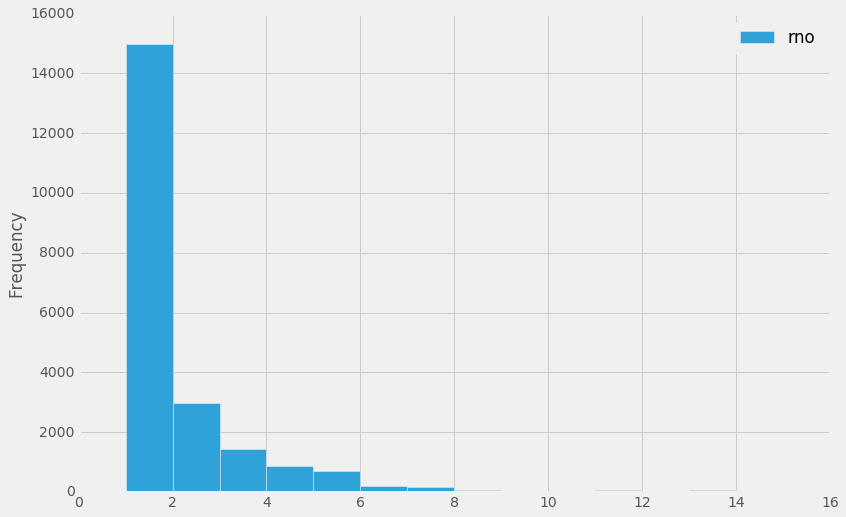

In [130]:
%matplotlib inline
import matplotlib as plot
plot.style.use('fivethirtyeight')

recip_mid_count.plot.hist(stacked=True, bins=15, range=[0, 15], figsize=(12,8))


In [ ]:
# How many messages have only one recepient?
# How many messages have >= 5 recepients?
# What's the highest number of recepients?
# Who sent the message with the highest number of recepients?
# Plot the distribution of recepient numbers using Bokeh.

In [64]:
(message_recip['from_eid'])

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [135]:
#1
males = employee[employee['gender'] == 'Male']
females = employee[employee['gender'] == 'Female']
print('men:', len(males), 'women:', len(females))

('men:', 113, 'women:', 43)


In [139]:
#2 - department distrib by gender
employee['department'].value_counts()

Other       71
Forestry    60
Legal       25
Name: department, dtype: int64

In [141]:
males['department'].value_counts()

Other       51
Forestry    50
Legal       12
Name: department, dtype: int64

In [140]:
females['department'].value_counts()

Other       20
Legal       13
Forestry    10
Name: department, dtype: int64

In [146]:
legal_dpt = employee[employee['department']=='Legal']
forest_dpt = employee[employee['department']=='Forestry']
other_dpt = employee[employee['department']=='Other']

legal_dpt['department'].value_counts()

Legal    25
Name: department, dtype: int64

In [147]:
forest_dpt[forest_dpt['gender']== 'Male']
           
males = employee[employee['gender'] == 'Male']
females = employee[employee['gender'] == 'Female']
print('men:', len(males), 'women:', len(females))

Forestry    60
Name: department, dtype: int64

In [148]:
other_dpt['department'].value_counts()

Other    71
Name: department, dtype: int64

Answer the following questions regarding received messages:

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

Which employees sent the most 'mass' emails?

Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.